### Importy bibliotek

In [1]:
import pandas as pd

import ipywidgets as widgets
from IPython.display import display, Math, Latex, Markdown
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn.objects as so

### Wczytywanie danych

In [16]:
DATA_PATH = './data/'

#all
races = pd.read_csv(DATA_PATH + 'races.csv', usecols=['raceId', 'year'])
results = pd.read_csv(DATA_PATH + 'results.csv', usecols=['raceId', 'driverId', 'constructorId'])

#Bar plot
drivers = pd.read_csv(DATA_PATH + 'drivers.csv', usecols=['driverId', 'nationality'])
driver_standings = pd.read_csv(DATA_PATH + 'driver_standings.csv', usecols=['driverId', 'wins'])

#Pie plot
constructors = pd.read_csv(DATA_PATH + 'constructors.csv', usecols=['constructorId', 'name'])
constructor_standings = pd.read_csv(DATA_PATH + 'constructor_standings.csv', usecols=['constructorId', 'wins'])

### Wykres słupkowy | Liczba kierowców z Top 10 narodowości

In [3]:
nationality_counts = drivers.groupby("nationality").size()
sorted_nationalities = nationality_counts.sort_values(ascending=False)
top_10_nationalities = sorted_nationalities.iloc[:10]

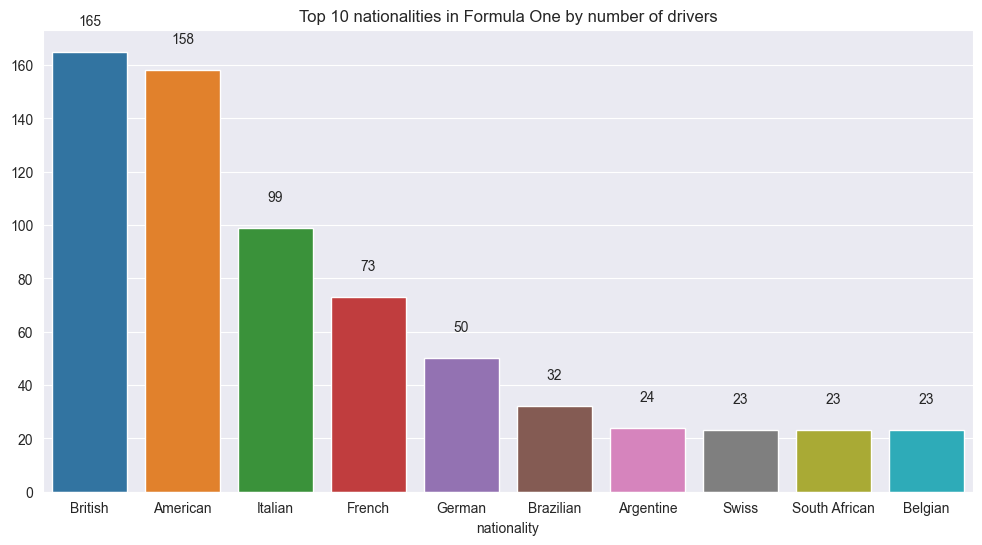

In [ ]:
x_values = top_10_nationalities.index
y_values = top_10_nationalities.values

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=x_values, y=y_values, ax=ax)
ax.set_title("Top 10 nationalities in Formula One by number of drivers")

for i, v in enumerate(y_values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=10)

plt.show()

### Wykres kołowy

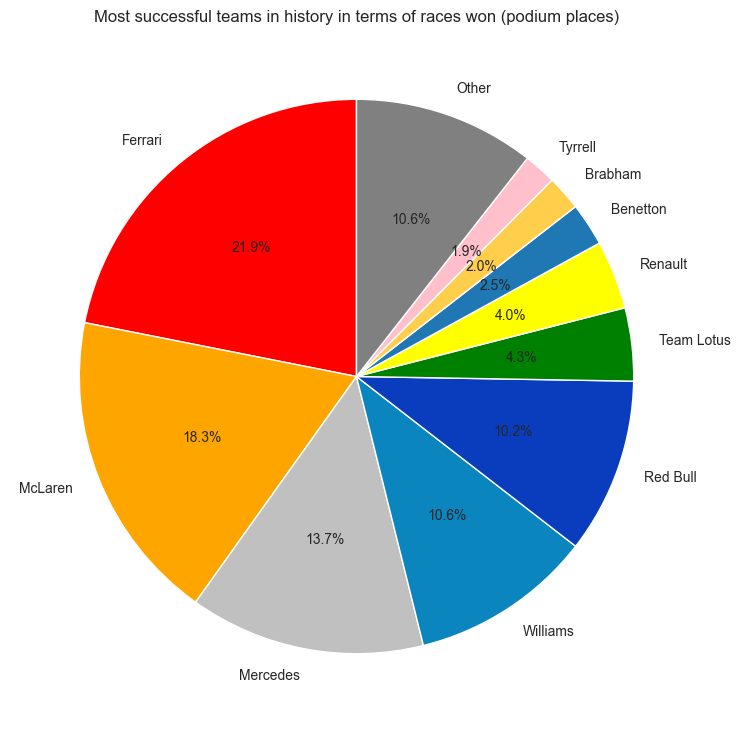

In [6]:
constructor_wins = constructor_standings[constructor_standings['wins'] != 0]
data = pd.merge(constructors, constructor_wins, on='constructorId')

win_counts = data.groupby('name')['wins'].sum()

top_constructors = win_counts.nlargest(5).index.tolist()
win_counts_top = win_counts.loc[top_constructors]
other_wins = win_counts.sum() - win_counts_top.sum()
win_counts_top['Other'] = other_wins
top_constructors.append('Other')

color_dict = {'Ferrari': 'red', 'McLaren': 'orange', 'Mercedes': 'silver', 'Williams': '#0a85bd',
                'Red Bull': '#0a3dbd', 'Brabham': '#ffce4b', 'Team Lotus': 'green', 'Renault': 'yellow', 'BRM': '#cc00cc', 'Tyrrell': 'pink', 'Other': 'gray'}

colors = win_counts_top.index.map(color_dict.get)


sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 9), dpi=100)
ax.pie(win_counts_top, labels=top_constructors, autopct='%1.1f%%', startangle=90, colors=colors)
ax.set_title('Most successful teams in history in terms of races won (podium places)')

plt.show()

### Pitstops

In [3]:
#read csv
pitstops = pd.read_csv("data/pit_stops.csv")
races = pd.read_csv("data/races.csv")
races_1950 = races.loc[races["year"] == 2023]

# display(Markdown("## Pitstops"))
# display(pitstops.head(5))

# display(Markdown("## races"))
# display(races.head(5))

# display(Markdown("## races 1950"))
# display(races_1950)

# display(Markdown(" ---"))

# # print(sorted(years:= races["year"].unique()))
# race_id_year = races_1950["raceId"]
# display(race_id_year)
# display(Markdown(" ---"))

# pitstops_in_year = pitstops[pitstops["raceId"].isin([841,848])]
# display(pitstops_in_year)
# display(pitstops.loc[pitstops["raceId"]==1094])

---

### Boxplot


,driverId,time,milliseconds,surname
0,1,1:31.686,91.686,Hamilton
1,1,1:28.791,88.791,Hamilton
2,1,1:28.587,88.587,Hamilton
3,1,1:28.789,88.789,Hamilton
4,1,1:28.630,88.630,Hamilton
...,...,...,...,...
993,847,1:30.821,90.821,Russell
994,847,1:30.647,90.647,Russell
995,847,1:31.577,91.577,Russell
996,847,1:32.794,92.794,Russell


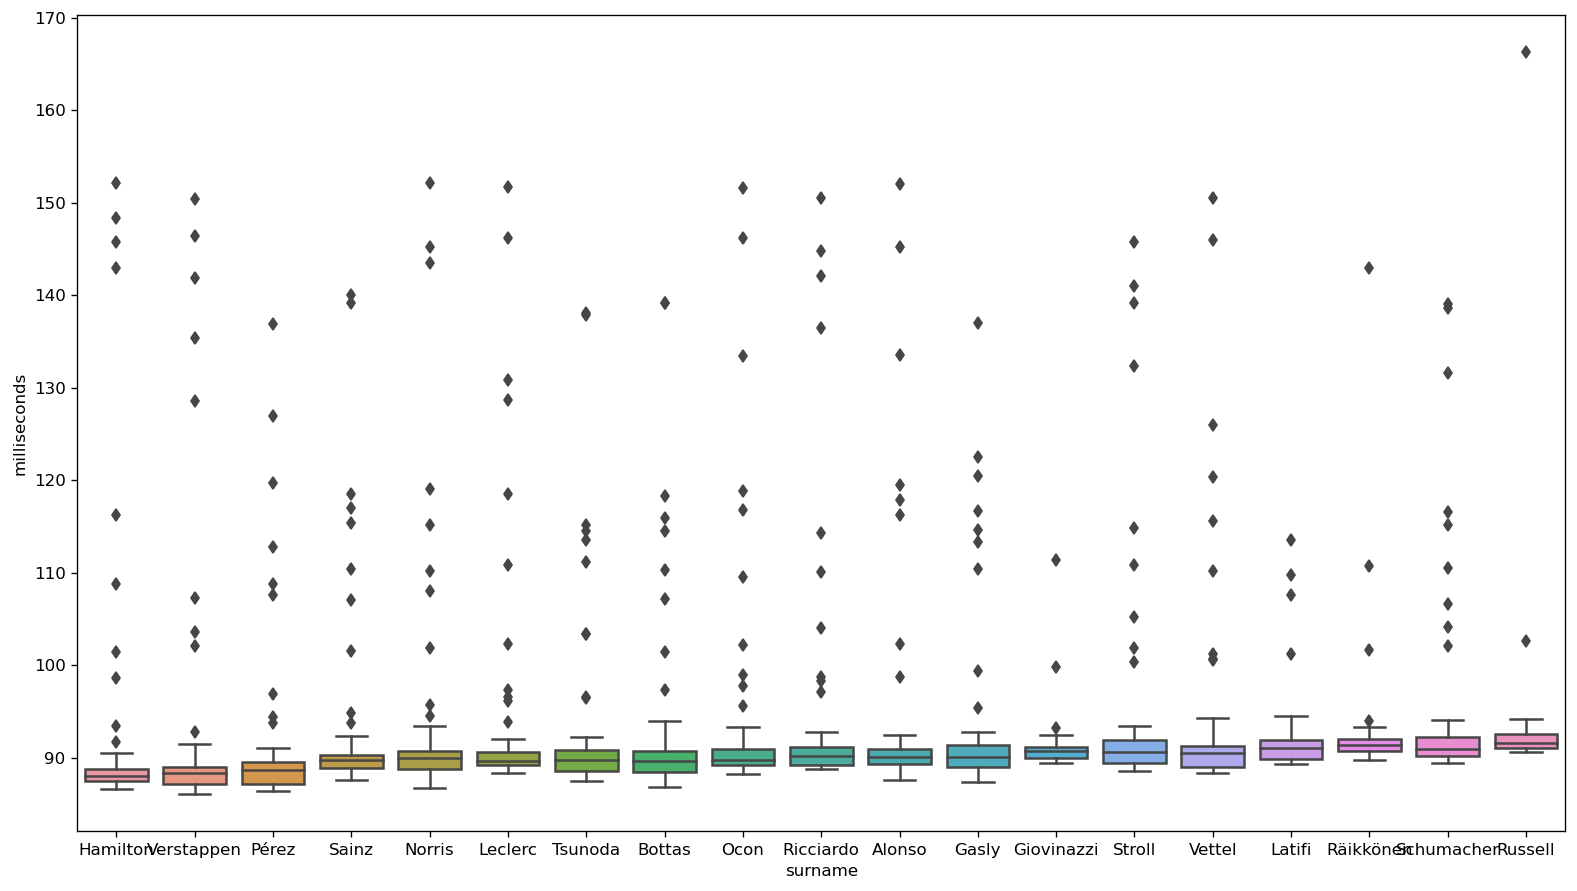

In [20]:

lap_times_df = pd.read_csv("data/lap_times.csv")
drivers_df = pd.read_csv("data/drivers.csv")

# Abu Dhabi Grand Prix 2021


df_boxplot = lap_times_df.loc[lap_times_df["raceId"]==1073]
df_boxplot = df_boxplot[["driverId","time","milliseconds"]]


df_boxplot["milliseconds"] = df_boxplot["milliseconds"].map(lambda x: int(x)/1000)


df_boxplot = pd.merge(df_boxplot,drivers_df[["driverId","surname"]],on="driverId")

driver_names = df_boxplot["surname"].unique().tolist()
boxplot_res = pd.DataFrame()
for driver in driver_names:
    driver_data = df_boxplot.loc[df_boxplot["surname"]==driver].sort_values(by="milliseconds")
    boxplot_res = pd.concat([boxplot_res,driver_data])

df_boxplot = df_boxplot
display(df_boxplot)

fig, ax = plt.subplots(figsize=(16, 9), dpi=120)
sns.boxplot(data=boxplot_res,y="milliseconds",x="surname",)
plt.show()


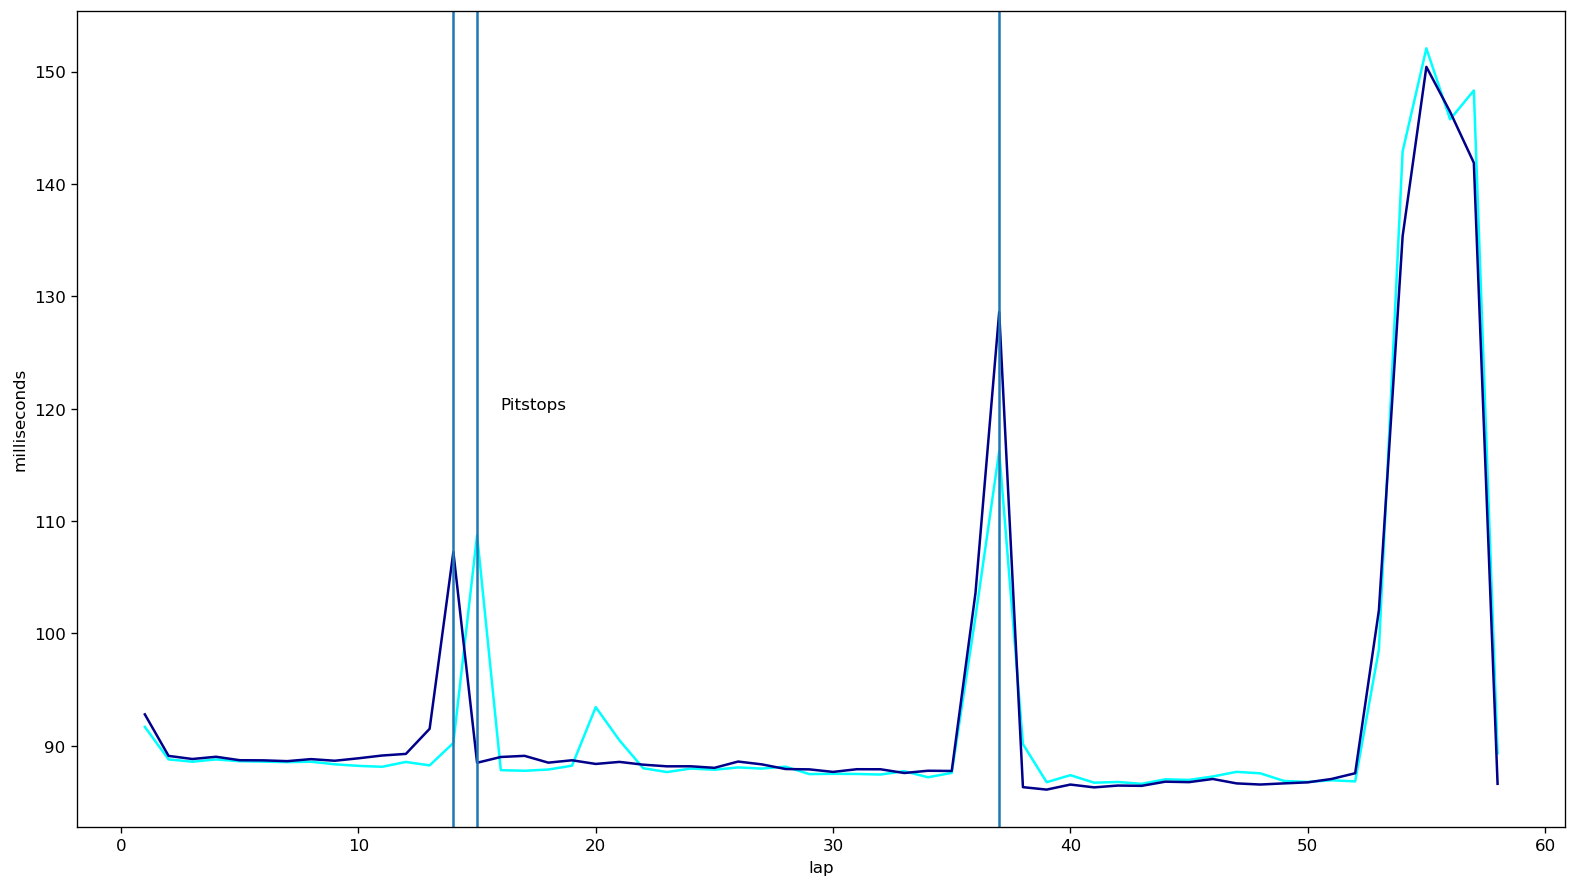

In [35]:
lap_times_df = pd.read_csv("data/lap_times.csv")

# Abu Dhabi Grand Prix 2021
df_line = lap_times_df.loc[lap_times_df["raceId"]==1073]
df_line = df_line[["driverId","time","milliseconds","lap"]]
df_line["milliseconds"] = df_line["milliseconds"].map(lambda x: int(x)/1000)
ham_results = df_line.loc[df_line["driverId"].isin([1])]
ver_results = df_line.loc[df_line["driverId"].isin([830])]
# df_line["milliseconds"] = df_line["milliseconds"].map()

fig, ax = plt.subplots(figsize=(16, 9), dpi=120)
ax = sns.lineplot(data=ham_results,x ="lap"  , y ="milliseconds",  color = "cyan")
ax = sns.lineplot(data=ver_results,x ="lap"  , y ="milliseconds",  color = "darkblue")
ax.axvline(14)
ax.axvline(15)
ax.axvline(37)
ax.text(16,120,"Pitstops")
plt.show()


